In [103]:
# Установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

In [104]:
import opendatasets as od

# Загрузим датасет на прямую с kaggle
dataset_url = 'https://www.kaggle.com/competitions/star-type-classification'

# Upload Kaggle.json file to Colab… (Caution: Do not Share kaggle.json as contains API key of your Kaggle Account)

od.download(dataset_url)

Skipping, found downloaded files in "./star-type-classification" (use force=True to force download)


In [105]:
import pandas as pd

train = pd.read_csv('/content/star-type-classification/train_star.csv')
test = pd.read_csv('/content/star-type-classification/test_star.csv')
sample_submit = pd.read_csv('/content/star-type-classification/sample_submition_stars.csv')
train

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014,Giant
20728,9.11,4.71,0.87,0.485,F5V,17.475105,Giant
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129,Giant
20730,8.06,37.33,0.97,0.758,K1V,20.920290,Giant


/tmp/ipython-input-1152/3599719307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train, x = train['TargetClass'], ax=ax, palette='hls')


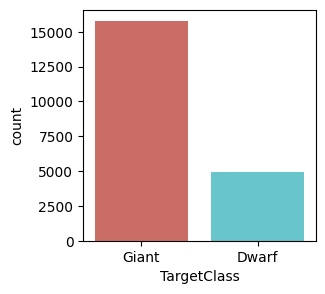

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))

sns.countplot(data = train, x = train['TargetClass'], ax=ax, palette='hls')
fig.show()

In [107]:

from sklearn.utils import resample

# Разделить данные по классам
df_class_0 = train[train['TargetClass'] == 'Dwarf']
df_class_1 = train[train['TargetClass'] == "Giant"]

# Удалить излишки из класса 1 (мажоритарного)
df_class_1_downsampled = resample(df_class_1,
                                   replace=False,    # без замены
                                   n_samples=len(df_class_0),  # столько же, сколько в классе 0
                                   random_state=42)  # для воспроизводимости

# Объединить данные
train = pd.concat([df_class_0, df_class_1_downsampled])

# Перемешать данные
train= train.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Баланс классов после андерсэмплинга:")
print(train['TargetClass'].value_counts())


Баланс классов после андерсэмплинга:
TargetClass
Giant    4939
Dwarf    4939
Name: count, dtype: int64


In [108]:
train.head(200)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,7.38,22.28,0.72,0.580,G1V,19.119576,Giant
1,9.04,2.22,1.49,1.412,K2/K3III:,15.771765,Dwarf
2,8.76,2.06,1.93,0.945,G8III,15.329336,Dwarf
3,5.56,5.77,0.57,1.637,M3Ib,14.365879,Dwarf
4,7.70,6.90,0.90,0.284,A9V,16.894245,Giant
...,...,...,...,...,...,...,...
195,7.56,3.23,0.63,1.088,K0III/IV,15.106012,Giant
196,8.35,2.04,1.04,0.118,B8/B9II,14.898151,Dwarf
197,6.49,6.48,1.01,0.910,G8III,15.547874,Dwarf
198,5.74,5.42,0.89,1.528,K5III,14.409996,Dwarf


In [109]:
'''
train['SpType'] = train['SpType'].str.replace(':', '', regex=False)
train['SpType'] = train['SpType'].str.replace('+', '', regex=False)
train['SpType'] = train['SpType'].str.replace('...', '', regex=False)
train['SpType'] = train['SpType'].str.replace('..', '', regex=False)
train['SpType'] = train['SpType'].str.replace(',', '/', regex=False)
train['SpType'] = train['SpType'].str.replace('-', '/', regex=False)
train['SpType'] = train['SpType'].str.replace('e', '', regex=False)
train['SpType'] = train['SpType'].str.replace('comp', '', regex=False)
train['SpType'] = train['SpType'].str.replace('np/', '', regex=False)
train['SpType'] = train['SpType'].str.replace('SB', '', regex=False)
#train['SpType'] = train['SpType'].str.split('/')
train.head(400)
'''

"\ntrain['SpType'] = train['SpType'].str.replace(':', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('+', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('...', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('..', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace(',', '/', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('-', '/', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('e', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('comp', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('np/', '', regex=False)\ntrain['SpType'] = train['SpType'].str.replace('SB', '', regex=False)\n#train['SpType'] = train['SpType'].str.split('/')\ntrain.head(400)\n"

In [110]:
import re
import pandas as pd

def clean_sptype(s):
    if pd.isna(s):
        return None

    s = str(s).upper()

    # убираем суффиксы и шум
    s = re.sub(r'[:\?\+\-]', '', s)
    s = re.sub(r'(SB|AB|VAR|E|P|N|AB|A|B)$', '', s)  # только в конце!

    return s

def parse_sptype(s):
    if s is None:
        return pd.Series([None, None, None])

    s = clean_sptype(s)

    # 1) Spectral class (очень важно ^ — только в начале!)
    m1 = re.search(r'^(O|B|A|F|G|K|M|C|N|S|W)', s)
    spec = m1.group(1) if m1 else None

    # 2) Subclass (0–9, 3.5, 5/6)
    m2 = re.search(r'(\d(?:\.\d)?(?:/\d)?)', s)
    subclass = m2.group(1) if m2 else None

    # 3) Luminosity class (сначала длинные!)
    m3 = re.search(r'(III/IV|IV/V|III|II|IV|V|I)', s)
    lum = m3.group(1) if m3 else None

    return pd.Series([spec, subclass, lum])

def normalize_lum(l):
    if l is None:
        return None
    if '/' in l:
        return l.split('/')[-1]   # можно [0], если хочешь Giant bias
    return l

train[['spec_class', 'subclass', 'lum_class']] = train['SpType'].apply(parse_sptype)
train['lum_class_clean'] = train['lum_class'].apply(normalize_lum)


import numpy as np

def fix_subclass(x):
    if pd.isna(x):
        return None

    x = str(x)

    # Если диапазон типа 5/7
    if '/' in x:
        parts = x.split('/')
        try:
            nums = [float(p) for p in parts]
            return np.mean(nums)
        except:
            return None

    # Обычное число
    try:
        return float(x)
    except:
        return None

train['subclass'] = train['subclass'].apply(fix_subclass)

train.head(500)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,spec_class,subclass,lum_class,lum_class_clean
0,7.38,22.28,0.72,0.580,G1V,19.119576,Giant,G,1.0,V,V
1,9.04,2.22,1.49,1.412,K2/K3III:,15.771765,Dwarf,K,2.0,III,III
2,8.76,2.06,1.93,0.945,G8III,15.329336,Dwarf,G,8.0,III,III
3,5.56,5.77,0.57,1.637,M3Ib,14.365879,Dwarf,M,3.0,I,I
4,7.70,6.90,0.90,0.284,A9V,16.894245,Giant,A,9.0,V,V
...,...,...,...,...,...,...,...,...,...,...,...
495,9.60,12.29,1.53,0.626,G0V,20.047760,Giant,G,0.0,V,V
496,9.40,8.30,1.49,0.608,F7V,18.995390,Giant,F,7.0,V,V
497,9.03,3.53,4.60,0.664,G2V,16.768873,Giant,G,2.0,V,V
498,8.67,4.04,1.10,0.978,G8III,16.701908,Dwarf,G,8.0,III,III


In [111]:
train = train[train['subclass'].notna()]
# Или эквивалентно: df[~df['subclass'].isna()]

In [112]:
train.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0
spec_class,0
subclass,0
lum_class,0


In [113]:
train[train['spec_class'].isna()]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,spec_class,subclass,lum_class,lum_class_clean


In [114]:
train[train['subclass'].isna()]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,spec_class,subclass,lum_class,lum_class_clean


In [115]:
train[train['lum_class_clean'].isna()]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,spec_class,subclass,lum_class,lum_class_clean


In [116]:
train.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0
spec_class,0
subclass,0
lum_class,0


In [117]:
train = train.drop('SpType',axis = 1)
train = train.drop('lum_class',axis = 1)
train.head(500)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,spec_class,subclass,lum_class_clean
0,7.38,22.28,0.72,0.580,19.119576,Giant,G,1.0,V
1,9.04,2.22,1.49,1.412,15.771765,Dwarf,K,2.0,III
2,8.76,2.06,1.93,0.945,15.329336,Dwarf,G,8.0,III
3,5.56,5.77,0.57,1.637,14.365879,Dwarf,M,3.0,I
4,7.70,6.90,0.90,0.284,16.894245,Giant,A,9.0,V
...,...,...,...,...,...,...,...,...,...
495,9.60,12.29,1.53,0.626,20.047760,Giant,G,0.0,V
496,9.40,8.30,1.49,0.608,18.995390,Giant,F,7.0,V
497,9.03,3.53,4.60,0.664,16.768873,Giant,G,2.0,V
498,8.67,4.04,1.10,0.978,16.701908,Dwarf,G,8.0,III


In [118]:
train[train['spec_class'].isna()]

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,spec_class,subclass,lum_class_clean


In [119]:
# сразу закодируем целевую переменную
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train['TargetClass'])
train['TargetClass'] = le.transform(train['TargetClass'])

train.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,spec_class,subclass,lum_class_clean
0,7.38,22.28,0.72,0.580,19.119576,1,G,1.0,V
1,9.04,2.22,1.49,1.412,15.771765,0,K,2.0,III
2,8.76,2.06,1.93,0.945,15.329336,0,G,8.0,III
3,5.56,5.77,0.57,1.637,14.365879,0,M,3.0,I
4,7.70,6.90,0.90,0.284,16.894245,1,A,9.0,V


In [120]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value',categories = [['O', 'B', 'A', 'F', 'G', 'K', 'M']] ,unknown_value=-1)
encoder.fit(train['spec_class'].values.reshape(-1,1))

encoded = encoder.transform(train['spec_class'].values.reshape(-1,1))
encoded

array([[4.],
       [5.],
       [4.],
       ...,
       [3.],
       [6.],
       [1.]])

In [121]:
train['spec_class'] = encoded
train

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,spec_class,subclass,lum_class_clean
0,7.38,22.28,0.72,0.580,19.119576,1,4.0,1.0,V
1,9.04,2.22,1.49,1.412,15.771765,0,5.0,2.0,III
2,8.76,2.06,1.93,0.945,15.329336,0,4.0,8.0,III
3,5.56,5.77,0.57,1.637,14.365879,0,6.0,3.0,I
4,7.70,6.90,0.90,0.284,16.894245,1,2.0,9.0,V
...,...,...,...,...,...,...,...,...,...
9873,8.54,21.87,1.02,0.667,20.239243,1,4.0,5.0,V
9874,9.57,3.46,1.67,0.397,17.265380,1,3.0,2.0,V
9875,8.43,5.30,1.00,0.426,17.051380,1,3.0,0.0,V
9876,8.71,0.67,1.20,1.601,12.840374,0,6.0,2.0,III


In [122]:
encoder2 = OrdinalEncoder(handle_unknown='use_encoded_value',categories=[['I', 'II', 'III', 'IV', 'V']], unknown_value=-1)
encoder2.fit(train['lum_class_clean'].values.reshape(-1,1))

encoded2 = encoder2.transform(train['lum_class_clean'].values.reshape(-1,1))
encoded2

array([[4.],
       [2.],
       [2.],
       ...,
       [4.],
       [2.],
       [3.]])

In [123]:
train['lum_class_clean'] = encoded2

train.head(500)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,spec_class,subclass,lum_class_clean
0,7.38,22.28,0.72,0.580,19.119576,1,4.0,1.0,4.0
1,9.04,2.22,1.49,1.412,15.771765,0,5.0,2.0,2.0
2,8.76,2.06,1.93,0.945,15.329336,0,4.0,8.0,2.0
3,5.56,5.77,0.57,1.637,14.365879,0,6.0,3.0,0.0
4,7.70,6.90,0.90,0.284,16.894245,1,2.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...
495,9.60,12.29,1.53,0.626,20.047760,1,4.0,0.0,4.0
496,9.40,8.30,1.49,0.608,18.995390,1,3.0,7.0,4.0
497,9.03,3.53,4.60,0.664,16.768873,1,4.0,2.0,4.0
498,8.67,4.04,1.10,0.978,16.701908,0,4.0,8.0,2.0


In [124]:
# выделим вектор признаков
X = train.drop(columns=['TargetClass'])
# вектор целевой переменной
y = train['TargetClass']

In [125]:
X.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
Amag,0
spec_class,0
subclass,0
lum_class_clean,0


In [126]:
#print(X[1260]['subclass'])

In [127]:
# Проверить типы данных в колонках
print(X.dtypes)

# Найти строки с нечисловыми значениями
for col in X.columns:
    print(f"{col}: {X[col].unique()[:50]}")

Vmag               float64
Plx                float64
e_Plx              float64
B-V                float64
Amag               float64
spec_class         float64
subclass           float64
lum_class_clean    float64
dtype: object
Vmag: [7.38 9.04 8.76 5.56 7.7  9.18 8.25 5.95 8.66 5.01 7.55 7.89 8.27 9.11
 6.77 8.3  8.18 8.19 7.58 8.05 9.57 8.13 6.71 9.24 9.16 8.47 7.54 7.62
 5.12 8.17 7.67 6.44 8.2  8.37 7.48 9.6  7.45 8.64 7.94 7.49 8.03 7.72
 5.59 6.73 8.24 7.66 7.07 5.32 7.52 6.88]
Plx: [22.28  2.22  2.06  5.77  6.9   2.02 -0.56 79.48  5.73  6.65  2.5   2.36
  1.86  1.76  5.3   4.97  2.68  2.9   3.84 14.15 22.59  4.36  3.96  1.64
  7.93  6.54  9.62  1.5   3.25  7.34  1.05  4.63  9.05  2.04  2.08  1.24
  1.53 13.01  9.16  1.56  5.51 -0.45  1.22  1.54 18.22 37.78  3.55  5.58
  4.45 21.13]
e_Plx: [0.72 1.49 1.93 0.57 0.9  0.81 1.07 0.77 1.47 0.78 0.68 0.74 1.69 0.83
 0.59 0.86 1.16 1.14 0.88 1.   1.24 0.75 0.76 1.17 0.67 0.7  0.97 2.51
 0.85 0.58 1.3  0.65 1.01 1.55 1.19 0.62 1.2  0.9

In [128]:
X['subclass'] = pd.to_numeric(X['subclass'], errors='coerce')

In [129]:
X.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
Amag,0
spec_class,0
subclass,0
lum_class_clean,0


In [130]:
# Найти строки, где возникли NaN
mask = X['subclass'].isna()
problem_rows = X[mask]
#print(problem_rows['subclass_original'])  # если сохранили оригинал

# Или найти уникальные значения, которые не преобразовались
print(X[X['subclass'].isna()].index)


# Посмотреть оригинальные значения в проблемных строках
print(X.loc[X['subclass'].isna(), 'subclass'].unique())

# Или посмотреть полные строки
print(X[X['subclass'].isna()]['subclass'])


Index([], dtype='int64')
[]
Series([], Name: subclass, dtype: float64)


In [131]:
print(X.shape)
print(y.shape)

(9869, 8)
(9869,)


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (6908, 8), (6908,)
Train dataset size: (2961, 8), (2961,)


In [133]:
X_train.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
Amag,0
spec_class,0
subclass,0
lum_class_clean,0


In [134]:
# Проверить типы данных в колонках
print(X_train.dtypes)

# Найти строки с нечисловыми значениями
for col in X_train.columns:
    print(f"{col}: {X_train[col].unique()[:10]}")

Vmag               float64
Plx                float64
e_Plx              float64
B-V                float64
Amag               float64
spec_class         float64
subclass           float64
lum_class_clean    float64
dtype: object
Vmag: [ 9.22  8.71 10.29  7.32  7.83  8.32  9.36 10.16  8.98  9.77]
Plx: [0.97 3.15 0.08 1.68 1.1  4.74 5.74 2.65 3.45 6.45]
e_Plx: [0.89 0.85 1.67 0.88 0.94 0.79 1.4  1.06 1.04 0.98]
B-V: [ 1.375  1.224  0.446  1.627 -0.017  0.361  0.498  0.234  1.032  0.55 ]
Amag: [14.153859 16.201553  9.80545  13.446547 13.036963 16.69889  18.15456
 17.27623  16.669094 18.817799]
spec_class: [ 5.  3.  1.  4.  2.  6.  0. -1.]
subclass: [4. 2. 5. 8. 0. 3. 1. 6. 7. 9.]
lum_class_clean: [2. 4. 1. 3. 0.]


In [135]:
X_train.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
Amag,0
spec_class,0
subclass,0
lum_class_clean,0


In [136]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

std.fit(X_train) # train.csv

X_train_std = std.transform(X_train) # train.csv
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)

X_test_std = std.transform(X_test) # test.csv
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)

In [137]:
X_train_std.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
Amag,0
spec_class,0
subclass,0
lum_class_clean,0


In [138]:
from sklearn.linear_model import LogisticRegression

# Создадим модель дерева решений
log_reg = LogisticRegression()

# обучение модели
log_reg.fit(X_train_std, y_train)

# предсказание ответов для тестовой выборки
y_pred = log_reg.predict(X_test_std)

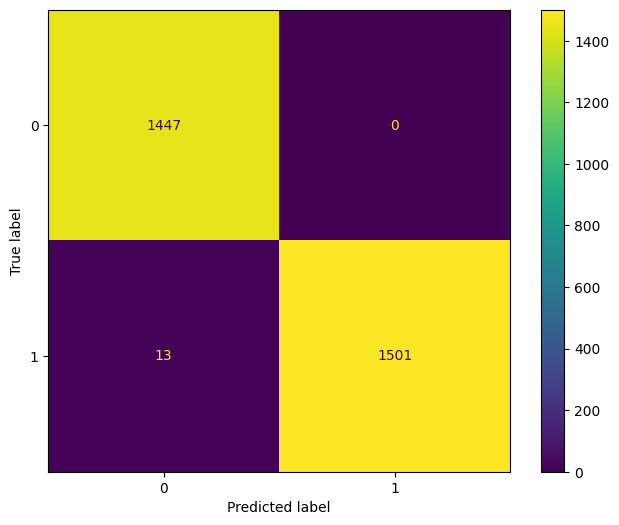

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=log_reg.classes_)

display.plot(ax=ax)

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9956095913542722
Precision: 1.0
Recall: 0.9914134742404227
F1-score: 0.9956882255389718


In [141]:
X_std = std.transform(X) # train.csv
X_std = pd.DataFrame(X_std,  columns=X_train.columns)


In [142]:
print(X.shape)
print(X_std.shape)
print(y.shape)

(9869, 8)
(9869, 8)
(9869,)


In [143]:
from sklearn.linear_model import LogisticRegression

# Создадим модель логистической регрессии
log_reg2 = LogisticRegression()

# обучение модели
log_reg2.fit(X_std, y)

LogisticRegression()

Accuracy: 0.9952376127267201
Precision: 0.9997955428337764
Recall: 0.9906807131280388
F1-score: 0.9952172585733184


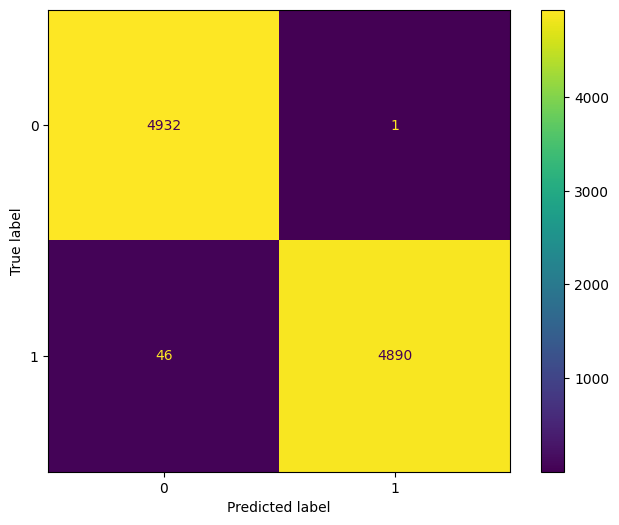

In [144]:
y_pred2 = log_reg2.predict(X_std)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y, y_pred2)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=log_reg.classes_)

display.plot(ax=ax)

print(f'Accuracy: {accuracy_score(y, y_pred2)}')
print(f'Precision: {precision_score(y, y_pred2)}')
print(f'Recall: {recall_score(y, y_pred2)}')
print(f'F1-score: {f1_score(y, y_pred2)}')

In [145]:
import re
import pandas as pd

def clean_sptype(s):
    if pd.isna(s):
        return None

    s = str(s).upper()

    # убираем суффиксы и шум
    s = re.sub(r'[:\?\+\-]', '', s)
    s = re.sub(r'(SB|AB|VAR|E|P|N|AB|A|B)$', '', s)  # только в конце!

    return s

def parse_sptype(s):
    if s is None:
        return pd.Series([None, None, None])

    s = clean_sptype(s)

    # 1) Spectral class (очень важно ^ — только в начале!)
    m1 = re.search(r'^(O|B|A|F|G|K|M|C|N|S|W)', s)
    spec = m1.group(1) if m1 else None

    # 2) Subclass (0–9, 3.5, 5/6)
    m2 = re.search(r'(\d(?:\.\d)?(?:/\d)?)', s)
    subclass = m2.group(1) if m2 else None

    # 3) Luminosity class (сначала длинные!)
    m3 = re.search(r'(III/IV|IV/V|III|II|IV|V|I)', s)
    lum = m3.group(1) if m3 else None

    return pd.Series([spec, subclass, lum])

def normalize_lum(l):
    if l is None:
        return None
    if '/' in l:
        return l.split('/')[-1]   # можно [0], если хочешь Giant bias
    return l

test[['spec_class', 'subclass', 'lum_class']] = test['SpType'].apply(parse_sptype)
test['lum_class_clean'] = test['lum_class'].apply(normalize_lum)


import numpy as np

def fix_subclass(x):
    if pd.isna(x):
        return None

    x = str(x)

    # Если диапазон типа 5/7
    if '/' in x:
        parts = x.split('/')
        try:
            nums = [float(p) for p in parts]
            return np.mean(nums)
        except:
            return None

    # Обычное число
    try:
        return float(x)
    except:
        return None

test['subclass'] = test['subclass'].apply(fix_subclass)

train.head(500)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,spec_class,subclass,lum_class_clean
0,7.38,22.28,0.72,0.580,19.119576,1,4.0,1.0,4.0
1,9.04,2.22,1.49,1.412,15.771765,0,5.0,2.0,2.0
2,8.76,2.06,1.93,0.945,15.329336,0,4.0,8.0,2.0
3,5.56,5.77,0.57,1.637,14.365879,0,6.0,3.0,0.0
4,7.70,6.90,0.90,0.284,16.894245,1,2.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...
495,9.60,12.29,1.53,0.626,20.047760,1,4.0,0.0,4.0
496,9.40,8.30,1.49,0.608,18.995390,1,3.0,7.0,4.0
497,9.03,3.53,4.60,0.664,16.768873,1,4.0,2.0,4.0
498,8.67,4.04,1.10,0.978,16.701908,0,4.0,8.0,2.0


In [146]:
test = test.fillna(1)
test.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
spec_class,0
subclass,0
lum_class,0
lum_class_clean,0


In [147]:
test = test.drop('SpType',axis = 1)
test = test.drop('lum_class',axis = 1)

encoded3 = encoder.transform(test['spec_class'].values.reshape(-1,1))
test['spec_class'] = encoded3

encoded4 = encoder2.transform(test['lum_class_clean'].values.reshape(-1,1))
test['lum_class_clean'] = encoded4

y_last = log_reg2.predict(test)


In [152]:

sample_submit['TargetClass'] = y_last

sample_submit.to_csv('my_submit_stars.csv', index=False)